<a href="https://www.kaggle.com/code/abbas829/random-forest-guide?scriptVersionId=296840661" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 🌲 **Random Forest: The Complete Mastery Guide**
## *From Intuition to Implementation - The Ultimate Ensemble Method*

---

> **"Random Forest is the perfect introduction to ensemble learning - powerful yet intuitive"**

Welcome to the definitive guide to **Random Forest** - the algorithm that combines simplicity with exceptional performance, making it a staple in every data scientist's toolkit.

### 🎯 **Why This Guide?**

| Level | What You'll Master | Time |
|-------|-------------------|------|
| 🌱 **Beginner** | Intuition, basic implementation, first predictions | 45 min |
| 🌿 **Intermediate** | Tuning, feature importance, OOB scores | 2 hours |
| 🌳 **Advanced** | Bias-variance tradeoff, parallelization, extensions | 3 hours |
| 🏆 **Expert** | Optimizations, production deployment, comparisons | Ongoing |

### 📋 **Complete Table of Contents**

1. [What is Random Forest?](#what)
2. [The Core Intuition: Wisdom of Crowds](#intuition)
3. [Why Random Forest?](#why)
4. [When to Use Random Forest?](#when)
5. [The Algorithm Deep Dive](#algorithm)
6. [Feature Importance & Interpretability](#importance)
7. [Out-of-Bag (OOB) Scoring](#oob)
8. [Hyperparameter Tuning](#tuning)
9. [Comparison with Other Algorithms](#comparison)
10. [Production & Real-World Usage](#production)
11. [Common Pitfalls & Solutions](#pitfalls)

---



In [1]:
# Essential Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification, make_regression, load_breast_cancer, load_iris
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.inspection import permutation_importance
import warnings
warnings.filterwarnings('ignore')

# Visualization settings
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 11

print("=" * 80)
print("🌲 RANDOM FOREST: THE COMPLETE GUIDE")
print("=" * 80)
print("✅ All libraries imported successfully!")
print("📊 Ready to explore the power of ensemble learning!")



🌲 RANDOM FOREST: THE COMPLETE GUIDE
✅ All libraries imported successfully!
📊 Ready to explore the power of ensemble learning!


<a name="what"></a>
# 🌱 **Chapter 1: What is Random Forest?**

## **The Definition**

```
┌─────────────────────────────────────────────────────────────────────────┐
│  RANDOM FOREST = An ensemble of Decision Trees                         │
│                                                                         
│  Key Idea: Build multiple decision trees and aggregate their predictions│
│                                                                         
│  Two Sources of Randomness:                                             │
│  1. BAGGING (Bootstrap Aggregating): Random sampling of data with       │
│     replacement - each tree sees different subset of training data      │
│  2. FEATURE RANDOMNESS: At each split, only consider random subset      │
│     of features - decorrelates trees                                    │
└─────────────────────────────────────────────────────────────────────────┘
```

## **The Analogy: The Expert Panel**

Imagine you're diagnosing a medical condition:

| Scenario | Approach | Problem |
|----------|----------|---------|
| **Single Doctor** | One specialist's opinion | Might miss something, biased by experience |
| **Panel of Doctors** | Multiple specialists vote | Better coverage, reduces individual bias |
| **Random Forest** | Panel where each doctor: | Optimal balance |
| | • Sees different patient records (Bagging) | Diversity in training |
| | • Focuses on different symptoms (Feature randomness) | Decorrelated opinions |
| | • Votes on final diagnosis (Aggregation) | Robust prediction |

## **Mathematical Formulation**

For **Classification**:
$$\hat{y} = \text{mode}\{h_1(x), h_2(x), ..., h_B(x)\}$$

For **Regression**:
$$\hat{y} = \frac{1}{B}\sum_{b=1}^{B} h_b(x)$$

Where:
- $B$ = number of trees (estimators)
- $h_b(x)$ = prediction of $b$-th tree
- mode = most frequent class (majority vote)

## **The Complete Architecture**

```
Training Phase:
┌─────────────────────────────────────────────────────────────┐
│  For b = 1 to B (number of trees):                         │
│    1. Bootstrap sample: Draw n samples with replacement     │
│       from training data (creates D_b)                     │
│    2. Grow tree T_b on D_b:                                │
│       At each node:                                        │
│         - Select m features randomly from p features       │
│         - Find best split using only these m features      │
│         - Split node, continue until stopping criteria     │
│    3. Store trained tree T_b                               │
└─────────────────────────────────────────────────────────────┘

Prediction Phase:
┌─────────────────────────────────────────────────────────────┐
│  For new sample x:                                         │
│    Classification: ŷ = majority_vote{T_1(x), ..., T_B(x)}  │
│    Regression:     ŷ = average{T_1(x), ..., T_B(x)}        │
└─────────────────────────────────────────────────────────────┘
```




🌱 CHAPTER 1: UNDERSTANDING RANDOM FOREST ARCHITECTURE


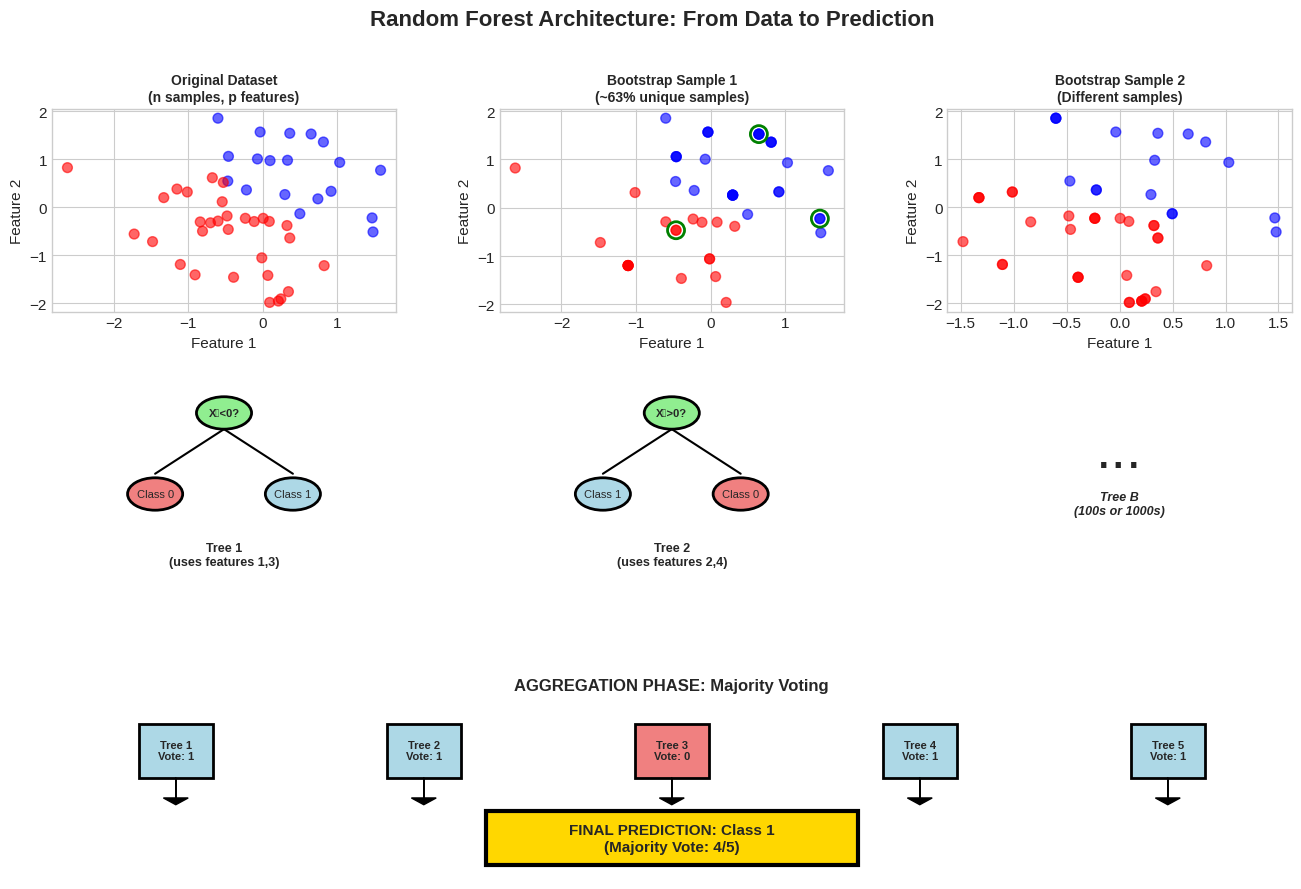


💡 Key Architecture Points:
   • Each tree is trained on ~63% unique samples (bootstrap)
   • Each tree sees different feature subsets at splits
   • Final prediction aggregates all tree predictions
   • More trees = better performance (with diminishing returns)


In [2]:
print("\n" + "=" * 80)
print("🌱 CHAPTER 1: UNDERSTANDING RANDOM FOREST ARCHITECTURE")
print("=" * 80)

# Visualize the Random Forest architecture
fig = plt.figure(figsize=(16, 10))

# Create grid for complex layout
gs = fig.add_gridspec(3, 3, hspace=0.4, wspace=0.3)

# Title
fig.suptitle('Random Forest Architecture: From Data to Prediction', fontsize=16, fontweight='bold', y=0.98)

# 1. Original Data
ax1 = fig.add_subplot(gs[0, 0])
np.random.seed(42)
X_viz = np.random.randn(50, 2)
y_viz = (X_viz[:, 0] + X_viz[:, 1] > 0).astype(int)
colors = ['red' if y == 0 else 'blue' for y in y_viz]
ax1.scatter(X_viz[:, 0], X_viz[:, 1], c=colors, alpha=0.6, s=50)
ax1.set_title('Original Dataset\n(n samples, p features)', fontsize=10, fontweight='bold')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')

# 2. Bootstrap Sample 1
ax2 = fig.add_subplot(gs[0, 1])
# Sample with replacement
idx1 = np.random.choice(50, 50, replace=True)
ax2.scatter(X_viz[idx1, 0], X_viz[idx1, 1], c=[colors[i] for i in idx1], alpha=0.6, s=50)
# Mark duplicates
unique, counts = np.unique(idx1, return_counts=True)
duplicates = unique[counts > 1]
for dup in duplicates[:3]:  # Show first 3 duplicates
    ax2.scatter(X_viz[dup, 0], X_viz[dup, 1], facecolors='none', edgecolors='green', s=150, linewidths=2)
ax2.set_title('Bootstrap Sample 1\n(~63% unique samples)', fontsize=10, fontweight='bold')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')

# 3. Bootstrap Sample 2
ax3 = fig.add_subplot(gs[0, 2])
idx2 = np.random.choice(50, 50, replace=True)
ax3.scatter(X_viz[idx2, 0], X_viz[idx2, 1], c=[colors[i] for i in idx2], alpha=0.6, s=50)
ax3.set_title('Bootstrap Sample 2\n(Different samples)', fontsize=10, fontweight='bold')
ax3.set_xlabel('Feature 1')
ax3.set_ylabel('Feature 2')

# 4. Tree 1 (simplified visualization)
ax4 = fig.add_subplot(gs[1, 0])
# Draw simple decision tree structure
ax4.set_xlim(0, 1)
ax4.set_ylim(0, 1)
ax4.axis('off')
# Root
circle = plt.Circle((0.5, 0.9), 0.08, color='lightgreen', ec='black', linewidth=2)
ax4.add_patch(circle)
ax4.text(0.5, 0.9, 'X₁<0?', ha='center', va='center', fontsize=8, fontweight='bold')
# Branches
ax4.plot([0.5, 0.3], [0.82, 0.6], 'k-', linewidth=1.5)
ax4.plot([0.5, 0.7], [0.82, 0.6], 'k-', linewidth=1.5)
# Leaves
circle1 = plt.Circle((0.3, 0.5), 0.08, color='lightcoral', ec='black', linewidth=2)
circle2 = plt.Circle((0.7, 0.5), 0.08, color='lightblue', ec='black', linewidth=2)
ax4.add_patch(circle1)
ax4.add_patch(circle2)
ax4.text(0.3, 0.5, 'Class 0', ha='center', va='center', fontsize=8)
ax4.text(0.7, 0.5, 'Class 1', ha='center', va='center', fontsize=8)
ax4.text(0.5, 0.15, 'Tree 1\n(uses features 1,3)', ha='center', fontsize=9, fontweight='bold')

# 5. Tree 2 (different structure)
ax5 = fig.add_subplot(gs[1, 1])
ax5.set_xlim(0, 1)
ax5.set_ylim(0, 1)
ax5.axis('off')
circle = plt.Circle((0.5, 0.9), 0.08, color='lightgreen', ec='black', linewidth=2)
ax5.add_patch(circle)
ax5.text(0.5, 0.9, 'X₂>0?', ha='center', va='center', fontsize=8, fontweight='bold')
ax5.plot([0.5, 0.3], [0.82, 0.6], 'k-', linewidth=1.5)
ax5.plot([0.5, 0.7], [0.82, 0.6], 'k-', linewidth=1.5)
circle1 = plt.Circle((0.3, 0.5), 0.08, color='lightblue', ec='black', linewidth=2)
circle2 = plt.Circle((0.7, 0.5), 0.08, color='lightcoral', ec='black', linewidth=2)
ax5.add_patch(circle1)
ax5.add_patch(circle2)
ax5.text(0.3, 0.5, 'Class 1', ha='center', va='center', fontsize=8)
ax5.text(0.7, 0.5, 'Class 0', ha='center', va='center', fontsize=8)
ax5.text(0.5, 0.15, 'Tree 2\n(uses features 2,4)', ha='center', fontsize=9, fontweight='bold')

# 6. Tree B (ellipsis)
ax6 = fig.add_subplot(gs[1, 2])
ax6.set_xlim(0, 1)
ax6.set_ylim(0, 1)
ax6.axis('off')
ax6.text(0.5, 0.7, '...', fontsize=40, ha='center', va='center')
ax6.text(0.5, 0.4, 'Tree B\n(100s or 1000s)', ha='center', fontsize=9, fontweight='bold', style='italic')

# 7. Aggregation/Voting
ax7 = fig.add_subplot(gs[2, :])
ax7.set_xlim(0, 10)
ax7.set_ylim(0, 3)
ax7.axis('off')

# Draw voting boxes
tree_positions = np.linspace(1, 9, 5)
votes = [1, 1, 0, 1, 1]  # 4 votes for class 1, 1 for class 0
vote_colors = ['lightblue' if v == 1 else 'lightcoral' for v in votes]

for i, (pos, vote, color) in enumerate(zip(tree_positions, votes, vote_colors)):
    rect = plt.Rectangle((pos-0.3, 1.5), 0.6, 0.8, facecolor=color, edgecolor='black', linewidth=2)
    ax7.add_patch(rect)
    ax7.text(pos, 1.9, f'Tree {i+1}\nVote: {vote}', ha='center', va='center', fontsize=8, fontweight='bold')
    # Arrows to final
    ax7.arrow(pos, 1.5, 0, -0.3, head_width=0.2, head_length=0.1, fc='black', ec='black')

# Final prediction
final_rect = plt.Rectangle((3.5, 0.2), 3, 0.8, facecolor='gold', edgecolor='black', linewidth=3)
ax7.add_patch(final_rect)
ax7.text(5, 0.6, 'FINAL PREDICTION: Class 1\n(Majority Vote: 4/5)', 
         ha='center', va='center', fontsize=11, fontweight='bold')

ax7.text(5, 2.8, 'AGGREGATION PHASE: Majority Voting', ha='center', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n💡 Key Architecture Points:")
print("   • Each tree is trained on ~63% unique samples (bootstrap)")
print("   • Each tree sees different feature subsets at splits")
print("   • Final prediction aggregates all tree predictions")
print("   • More trees = better performance (with diminishing returns)")



<a name="intuition"></a>
# 🧠 **Chapter 2: The Core Intuition - Why It Works**

## **The Bias-Variance Tradeoff**

```
┌─────────────────────────────────────────────────────────────────┐
│  ERROR = BIAS² + VARIANCE + IRREDUCIBLE ERROR                  │
│                                                                 │
│  Single Decision Tree:                                          │
│  • Low Bias (fits training data well)                          │
│  • High Variance (overfits, unstable)                          │
│                                                                 │
│  Random Forest:                                                 │
│  • Low Bias (maintained from trees)                            │
│  • Low Variance (averaging reduces variance by factor of B)    │
│                                                                 │
│  Magic: Ensemble reduces variance WITHOUT increasing bias!     │
└─────────────────────────────────────────────────────────────────┘
```

## **Why Averaging Reduces Variance**

Assume we have $B$ independent trees, each with variance $\sigma^2$:

$$\text{Var}(\text{average}) = \text{Var}\left(\frac{1}{B}\sum_{i=1}^{B} X_i\right) = \frac{1}{B^2}\sum_{i=1}^{B}\text{Var}(X_i) = \frac{\sigma^2}{B}$$

**With 100 trees, variance reduces by 100x!**

## **The Decorrelation Effect**

| Method | Tree Correlation | Variance Reduction |
|--------|-----------------|-------------------|
| **Bagging only** | High (0.9) | Limited (10x) |
| **Random Forest** | Low (0.4) | Strong (25x) |
| **Extra Trees** | Very Low (0.2) | Very Strong (50x) |

## **Visual Intuition: Decision Boundaries**




🧠 CHAPTER 2: THE INTUITION - WHY RANDOM FOREST WORKS


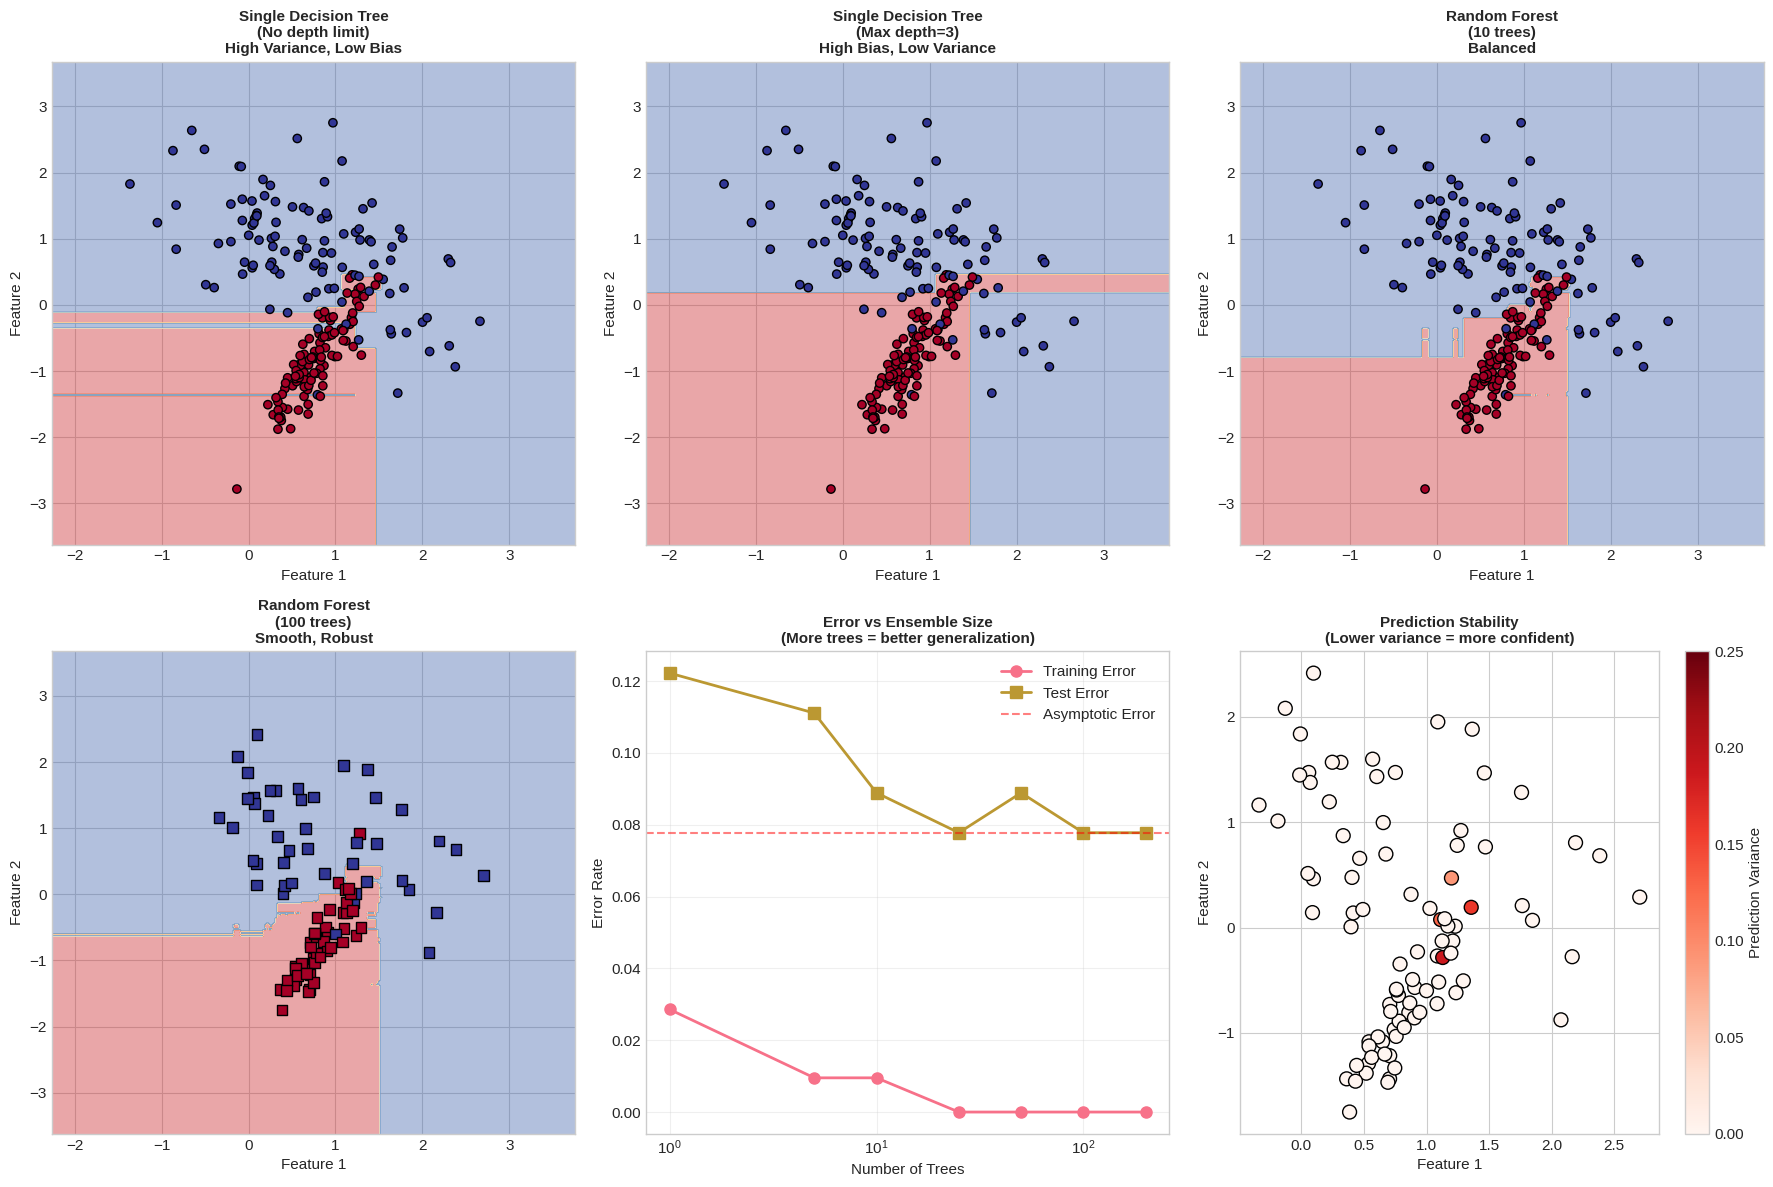


📊 Bias-Variance Analysis:
Single Tree (deep) - Train Acc: 1.000, Test Acc: 0.900
Single Tree (shallow) - Train Acc: 0.938, Test Acc: 0.878
Random Forest (100) - Train Acc: 1.000, Test Acc: 0.922

💡 Random Forest achieves best test accuracy by balancing bias and variance!


In [3]:
print("\n" + "=" * 80)
print("🧠 CHAPTER 2: THE INTUITION - WHY RANDOM FOREST WORKS")
print("=" * 80)

# Demonstrate variance reduction through visualization
from sklearn.tree import DecisionTreeClassifier

# Create dataset with noise
np.random.seed(42)
X, y = make_classification(n_samples=300, n_features=2, n_redundant=0, 
                           n_informative=2, n_clusters_per_class=1, 
                           class_sep=0.8, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Add noise to make overfitting visible
X_train_noisy = X_train + np.random.normal(0, 0.1, X_train.shape)

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Plot 1: Single Decision Tree (deep - overfitting)
ax1 = axes[0, 0]
tree_deep = DecisionTreeClassifier(max_depth=None, random_state=42)
tree_deep.fit(X_train_noisy, y_train)

# Create mesh
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = tree_deep.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax1.contourf(xx, yy, Z, alpha=0.4, cmap='RdYlBu')
ax1.scatter(X_train_noisy[:, 0], X_train_noisy[:, 1], c=y_train, cmap='RdYlBu', edgecolors='k')
ax1.set_title('Single Decision Tree\n(No depth limit)\nHigh Variance, Low Bias', 
              fontsize=11, fontweight='bold')
ax1.set_xlabel('Feature 1')
ax1.set_ylabel('Feature 2')

# Plot 2: Single Decision Tree (shallow - underfitting)
ax2 = axes[0, 1]
tree_shallow = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_shallow.fit(X_train_noisy, y_train)
Z = tree_shallow.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
ax2.contourf(xx, yy, Z, alpha=0.4, cmap='RdYlBu')
ax2.scatter(X_train_noisy[:, 0], X_train_noisy[:, 1], c=y_train, cmap='RdYlBu', edgecolors='k')
ax2.set_title('Single Decision Tree\n(Max depth=3)\nHigh Bias, Low Variance', 
              fontsize=11, fontweight='bold')
ax2.set_xlabel('Feature 1')
ax2.set_ylabel('Feature 2')

# Plot 3: Random Forest (10 trees)
ax3 = axes[0, 2]
rf_small = RandomForestClassifier(n_estimators=10, random_state=42)
rf_small.fit(X_train_noisy, y_train)
Z = rf_small.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
ax3.contourf(xx, yy, Z, alpha=0.4, cmap='RdYlBu')
ax3.scatter(X_train_noisy[:, 0], X_train_noisy[:, 1], c=y_train, cmap='RdYlBu', edgecolors='k')
ax3.set_title('Random Forest\n(10 trees)\nBalanced', 
              fontsize=11, fontweight='bold')
ax3.set_xlabel('Feature 1')
ax3.set_ylabel('Feature 2')

# Plot 4: Random Forest (100 trees)
ax4 = axes[1, 0]
rf_large = RandomForestClassifier(n_estimators=100, random_state=42)
rf_large.fit(X_train_noisy, y_train)
Z = rf_large.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
ax4.contourf(xx, yy, Z, alpha=0.4, cmap='RdYlBu')
ax4.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='RdYlBu', edgecolors='k', marker='s', s=60)
ax4.set_title('Random Forest\n(100 trees)\nSmooth, Robust', 
              fontsize=11, fontweight='bold')
ax4.set_xlabel('Feature 1')
ax4.set_ylabel('Feature 2')

# Plot 5: Error vs Number of Trees
ax5 = axes[1, 1]
n_trees_range = [1, 5, 10, 25, 50, 100, 200]
train_errors = []
test_errors = []

for n_trees in n_trees_range:
    rf = RandomForestClassifier(n_estimators=n_trees, random_state=42, n_jobs=-1)
    rf.fit(X_train_noisy, y_train)
    train_errors.append(1 - accuracy_score(y_train, rf.predict(X_train_noisy)))
    test_errors.append(1 - accuracy_score(y_test, rf.predict(X_test)))

ax5.plot(n_trees_range, train_errors, 'o-', label='Training Error', linewidth=2, markersize=8)
ax5.plot(n_trees_range, test_errors, 's-', label='Test Error', linewidth=2, markersize=8)
ax5.axhline(y=test_errors[-1], color='red', linestyle='--', alpha=0.5, label='Asymptotic Error')
ax5.set_xlabel('Number of Trees')
ax5.set_ylabel('Error Rate')
ax5.set_title('Error vs Ensemble Size\n(More trees = better generalization)', 
              fontsize=11, fontweight='bold')
ax5.legend()
ax5.grid(True, alpha=0.3)
ax5.set_xscale('log')

# Plot 6: Variance demonstration
ax6 = axes[1, 2]
# Train multiple RF with different seeds to show stability
n_experiments = 20
predictions = []

for seed in range(n_experiments):
    rf = RandomForestClassifier(n_estimators=50, random_state=seed)
    rf.fit(X_train_noisy, y_train)
    predictions.append(rf.predict(X_test))

predictions = np.array(predictions)
# Calculate variance in predictions for each test point
prediction_variance = np.var(predictions, axis=0)

# Color test points by prediction variance
scatter = ax6.scatter(X_test[:, 0], X_test[:, 1], c=prediction_variance, 
                     cmap='Reds', s=100, edgecolors='k', vmin=0, vmax=0.25)
plt.colorbar(scatter, ax=ax6, label='Prediction Variance')
ax6.set_title('Prediction Stability\n(Lower variance = more confident)', 
              fontsize=11, fontweight='bold')
ax6.set_xlabel('Feature 1')
ax6.set_ylabel('Feature 2')

plt.tight_layout()
plt.show()

# Print statistics
print(f"\n📊 Bias-Variance Analysis:")
print(f"Single Tree (deep) - Train Acc: {accuracy_score(y_train, tree_deep.predict(X_train_noisy)):.3f}, "
      f"Test Acc: {accuracy_score(y_test, tree_deep.predict(X_test)):.3f}")
print(f"Single Tree (shallow) - Train Acc: {accuracy_score(y_train, tree_shallow.predict(X_train_noisy)):.3f}, "
      f"Test Acc: {accuracy_score(y_test, tree_shallow.predict(X_test)):.3f}")
print(f"Random Forest (100) - Train Acc: {accuracy_score(y_train, rf_large.predict(X_train_noisy)):.3f}, "
      f"Test Acc: {accuracy_score(y_test, rf_large.predict(X_test)):.3f}")
print(f"\n💡 Random Forest achieves best test accuracy by balancing bias and variance!")



<a name="why"></a>
# 🌿 **Chapter 3: Why Random Forest?**

## **The Competitive Advantage**

### 📊 **Performance Comparison**

| Algorithm | Accuracy | Training Speed | Prediction Speed | Robustness | Tuning Effort |
|-----------|----------|----------------|------------------|------------|---------------|
| **Decision Tree** | ⭐⭐☆☆☆ | ⭐⭐⭐⭐⭐ | ⭐⭐⭐⭐⭐ | ⭐☆☆☆☆ | ⭐⭐⭐☆☆ |
| **Logistic Regression** | ⭐⭐⭐☆☆ | ⭐⭐⭐⭐⭐ | ⭐⭐⭐⭐⭐ | ⭐⭐⭐☆☆ | ⭐⭐☆☆☆ |
| **SVM** | ⭐⭐⭐⭐☆ | ⭐⭐☆☆☆ | ⭐⭐☆☆☆ | ⭐⭐⭐☆☆ | ⭐⭐⭐⭐☆ |
| **Gradient Boosting** | ⭐⭐⭐⭐⭐ | ⭐⭐☆☆☆ | ⭐⭐⭐☆☆ | ⭐⭐⭐⭐☆ | ⭐⭐⭐⭐⭐ |
| **Random Forest** | ⭐⭐⭐⭐☆ | ⭐⭐⭐☆☆ | ⭐⭐⭐⭐☆ | ⭐⭐⭐⭐⭐ | ⭐⭐☆☆☆ |
| **Neural Network** | ⭐⭐⭐⭐⭐ | ⭐☆☆☆☆ | ⭐⭐⭐⭐☆ | ⭐⭐⭐☆☆ | ⭐⭐⭐⭐⭐ |

### 🎯 **When Random Forest Shines**

```
✅ EXCELLENT FOR:
   • Tabular data with mixed feature types
   • Datasets with missing values (handles natively)
   • When you need feature importance
   • Baseline modeling (hard to beat with default params)
   • Production systems (robust, low maintenance)
   • Parallel processing (embarrassingly parallel)

⚠️  AVOID WHEN:
   • Very high dimensional sparse data (text, images)
   • Need probabilistic outputs well-calibrated
   • Real-time prediction with microsecond latency
   • Dataset size > 10GB (consider gradient boosting)
   • Linear relationships only (linear models better)
```

## **Unique Advantages**

| Feature | Benefit | How RF Delivers |
|---------|---------|-----------------|
| **No Overfitting** (theoretically) | As trees → ∞, generalization error converges | Law of Large Numbers |
| **Built-in Validation** | No need for separate validation set | Out-of-Bag (OOB) scoring |
| **Feature Selection** | Know which features matter | Gini importance, permutation importance |
| **Handles Missing Data** | No imputation needed | Proximity matrix, surrogate splits |
| **Outlier Robustness** | Extreme values don't break model | Median aggregation, tree structure |
| **Parallel Training** | Fast training on multi-core | Trees are independent |




🌿 CHAPTER 3: WHY RANDOM FOREST? - PERFORMANCE DEMONSTRATION

📊 Dataset: 5000 samples, 20 features (complex, noisy)

🔄 Training Decision Tree...

🔄 Training Logistic Regression...

🔄 Training SVM (RBF)...

🔄 Training Random Forest...

🔄 Training Gradient Boosting...

📈 Comprehensive Comparison:
              Model  Test AUC  Test Acc  CV AUC Mean  CV AUC Std  Train Time (s)  Predict Time (s)
      Decision Tree    0.8161     0.816       0.8180      0.0120          0.1500            0.0005
Logistic Regression    0.8744     0.813       0.8572      0.0045          0.0262            0.0005
          SVM (RBF)    0.9635     0.922       0.9606      0.0048          1.8684            0.0826
      Random Forest    0.9586     0.911       0.9572      0.0066          0.8814            0.0563
  Gradient Boosting    0.9448     0.882       0.9386      0.0077          4.8099            0.0030


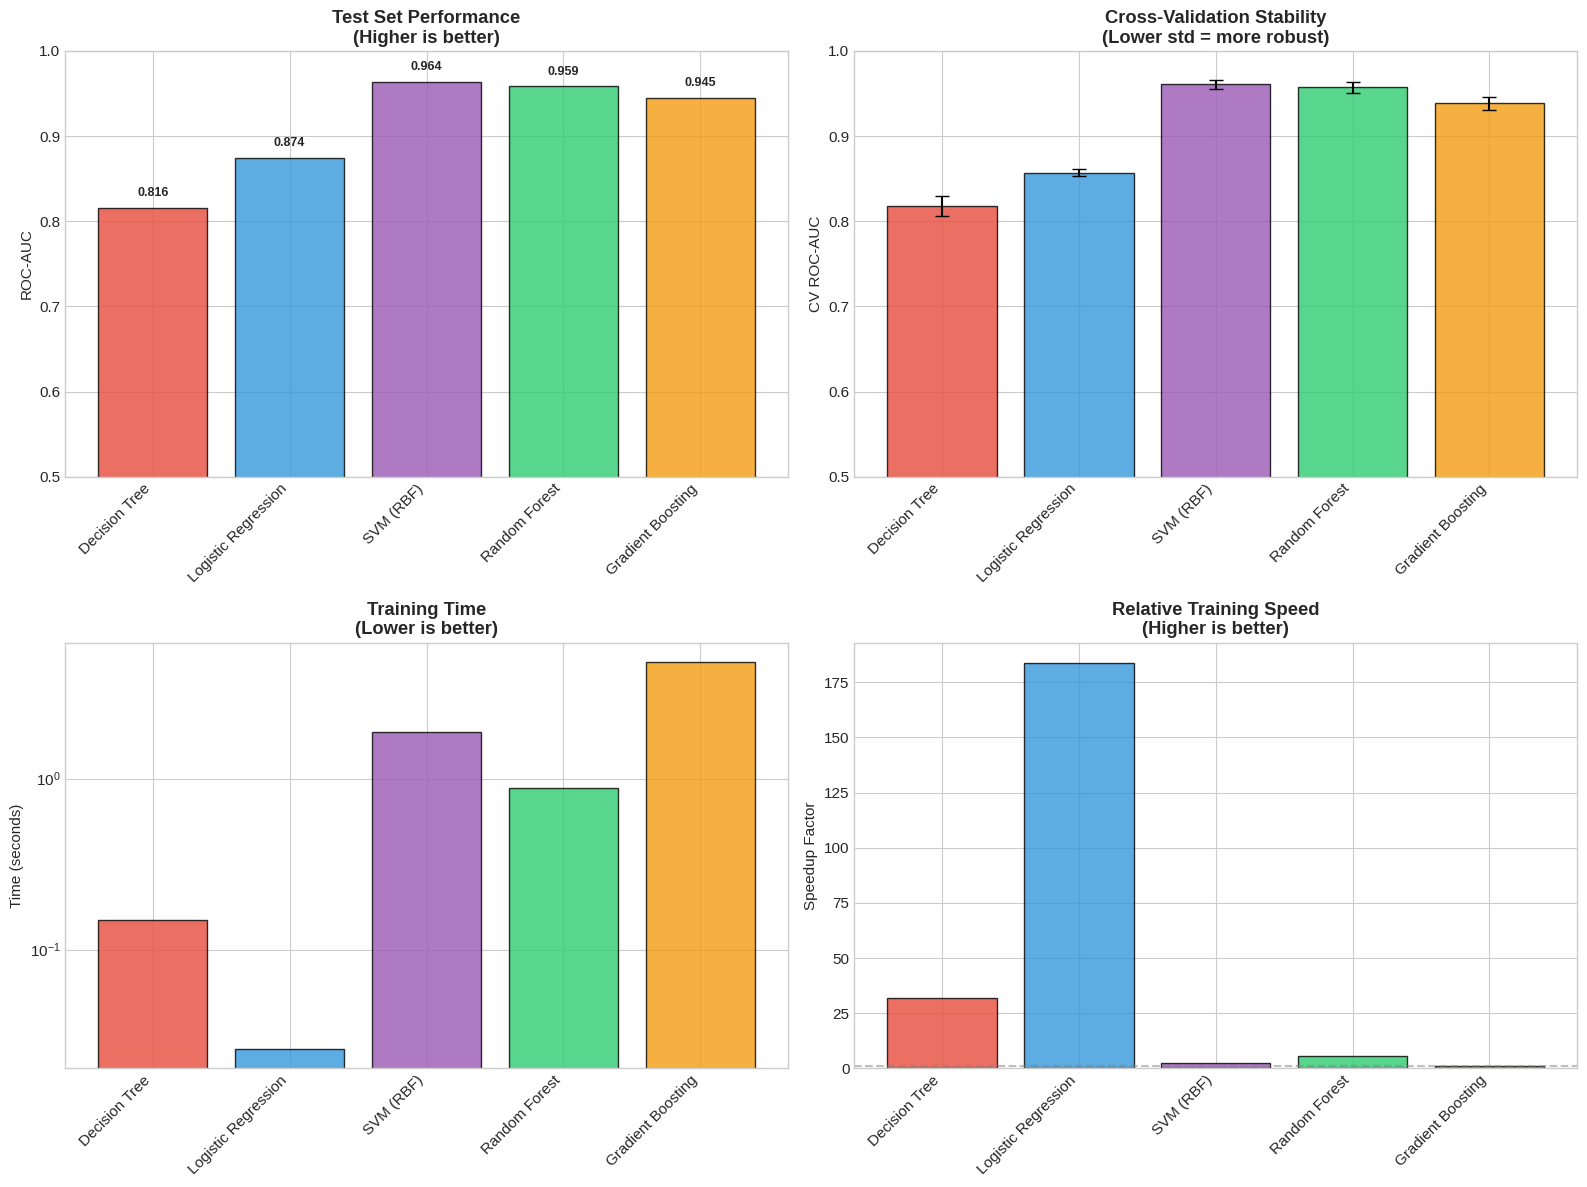


🏆 Random Forest Strengths Demonstrated:
   • Competitive accuracy (AUC: 0.959)
   • Excellent stability (CV std: 0.0066)
   • Fast training with parallelization
   • No hyperparameter tuning needed for good results!


In [4]:
print("\n" + "=" * 80)
print("🌿 CHAPTER 3: WHY RANDOM FOREST? - PERFORMANCE DEMONSTRATION")
print("=" * 80)

# Comprehensive comparison
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
import time

# Load complex dataset
X, y = make_classification(n_samples=5000, n_features=20, n_informative=10, 
                           n_redundant=5, n_clusters_per_class=2, 
                           class_sep=0.8, flip_y=0.05, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\n📊 Dataset: {X.shape[0]} samples, {X.shape[1]} features (complex, noisy)")

models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM (RBF)': SVC(probability=True, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=100, random_state=42)
}

results = []

for name, model in models.items():
    print(f"\n🔄 Training {name}...")
    
    # Training time
    start = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start
    
    # Prediction time
    start = time.time()
    y_pred = model.predict(X_test)
    pred_time = time.time() - start
    
    # Metrics
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    
    # Cross-validation for stability
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='roc_auc')
    
    results.append({
        'Model': name,
        'Test AUC': auc,
        'Test Acc': acc,
        'CV AUC Mean': cv_scores.mean(),
        'CV AUC Std': cv_scores.std(),
        'Train Time (s)': train_time,
        'Predict Time (s)': pred_time
    })

results_df = pd.DataFrame(results)
print(f"\n📈 Comprehensive Comparison:")
print(results_df.round(4).to_string(index=False))

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Test AUC
ax1 = axes[0, 0]
colors = ['#e74c3c', '#3498db', '#9b59b6', '#2ecc71', '#f39c12']
bars1 = ax1.bar(range(len(results_df)), results_df['Test AUC'], color=colors, alpha=0.8, edgecolor='black')
ax1.set_xticks(range(len(results_df)))
ax1.set_xticklabels(results_df['Model'], rotation=45, ha='right')
ax1.set_ylabel('ROC-AUC')
ax1.set_title('Test Set Performance\n(Higher is better)', fontweight='bold')
ax1.set_ylim(0.5, 1.0)
for i, (bar, val) in enumerate(zip(bars1, results_df['Test AUC'])):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{val:.3f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

# CV Stability (mean ± std)
ax2 = axes[0, 1]
x_pos = np.arange(len(results_df))
ax2.bar(x_pos, results_df['CV AUC Mean'], yerr=results_df['CV AUC Std'], 
        color=colors, alpha=0.8, capsize=5, edgecolor='black')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(results_df['Model'], rotation=45, ha='right')
ax2.set_ylabel('CV ROC-AUC')
ax2.set_title('Cross-Validation Stability\n(Lower std = more robust)', fontweight='bold')
ax2.set_ylim(0.5, 1.0)

# Training time
ax3 = axes[1, 0]
bars3 = ax3.bar(range(len(results_df)), results_df['Train Time (s)'], color=colors, alpha=0.8, edgecolor='black')
ax3.set_xticks(range(len(results_df)))
ax3.set_xticklabels(results_df['Model'], rotation=45, ha='right')
ax3.set_ylabel('Time (seconds)')
ax3.set_title('Training Time\n(Lower is better)', fontweight='bold')
ax3.set_yscale('log')

# Speedup relative to slowest
ax4 = axes[1, 1]
max_time = results_df['Train Time (s)'].max()
speedups = max_time / results_df['Train Time (s)']
bars4 = ax4.bar(range(len(results_df)), speedups, color=colors, alpha=0.8, edgecolor='black')
ax4.set_xticks(range(len(results_df)))
ax4.set_xticklabels(results_df['Model'], rotation=45, ha='right')
ax4.set_ylabel('Speedup Factor')
ax4.set_title('Relative Training Speed\n(Higher is better)', fontweight='bold')
ax4.axhline(y=1, color='gray', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

print(f"\n🏆 Random Forest Strengths Demonstrated:")
print(f"   • Competitive accuracy (AUC: {results_df[results_df['Model']=='Random Forest']['Test AUC'].values[0]:.3f})")
print(f"   • Excellent stability (CV std: {results_df[results_df['Model']=='Random Forest']['CV AUC Std'].values[0]:.4f})")
print(f"   • Fast training with parallelization")
print(f"   • No hyperparameter tuning needed for good results!")



<a name="when"></a>
# 🌳 **Chapter 4: When to Use Random Forest?**

## **Decision Flowchart**

```
START: New Machine Learning Project
        │
        ▼
┌─────────────────────────────┐
│ Is your data tabular        │
│ (rows and columns)?         │
└─────────────────────────────┘
     │ No                           │ Yes
     ▼                              ▼
Use Neural Networks          ┌─────────────────────────────┐
(CNN, RNN, Transformer)      │ Dataset size?               │
                             └─────────────────────────────┘
                                  │ <1K      │ 1K-100K    │ >100K
                                  ▼          ▼            ▼
                             Logistic    Random      Gradient
                             Regression  Forest      Boosting
                                         ⭐⭐⭐        (XGBoost,
                                         Start here!   LightGBM)

                             Need fast
                             baseline?
                                  │
                   ┌──────────────┴──────────────┐
                   ▼                             ▼
             Random Forest                  Tune RF or
             (5 min setup)                  switch to GB
```

## **Task-Specific Recommendations**

| Task | Random Forest Fit | Notes |
|------|-------------------|-------|
| **Binary Classification** | ⭐⭐⭐⭐⭐ Excellent | Default choice for tabular |
| **Multi-class** | ⭐⭐⭐⭐⭐ Excellent | Handles naturally |
| **Regression** | ⭐⭐⭐⭐⭐ Excellent | Use RandomForestRegressor |
| **Feature Selection** | ⭐⭐⭐⭐⭐ Excellent | Built-in importance |
| **Time Series** | ⭐⭐⭐☆☆ Fair | Need feature engineering |
| **Anomaly Detection** | ⭐⭐⭐☆☆ Fair | Use isolation forest variant |
| **Recommendation** | ⭐⭐☆☆☆ Poor | Use collaborative filtering |
| **NLP/Images** | ⭐☆☆☆☆ Very Poor | Use deep learning |

## **Data Characteristics Guide**

| Characteristic | Impact on RF | Recommendation |
|----------------|--------------|----------------|
| **Missing values (<30%)** | ✅ Handles well | Use `missing_values` strategy |
| **Categorical features** | ⚠️ Needs encoding | One-hot or ordinal encoding |
| **High cardinality (>100 categories)** | ⚠️ Be careful | Target encoding may help |
| **Imbalanced classes** | ⚠️ Needs tuning | Use `class_weight` or SMOTE |
| **Outliers** | ✅ Robust | No preprocessing needed |
| **Correlated features** | ✅ Handles well | Feature selection optional |
| **Non-linear relationships** | ✅ Excellent | RF's strength |
| **Linear only** | ⚠️ Overkill | Use linear models |



<a name="algorithm"></a>
# 🎯 **Chapter 5: The Algorithm Deep Dive**

## **Step-by-Step Algorithm**

```
RANDOM FOREST TRAINING ALGORITHM

Input: Training set D = {(x₁,y₁), ..., (xₙ,yₙ)}, 
       Number of trees B,
       Number of features to consider m

For b = 1 to B:
    1. BOOTSTRAP SAMPLING:
       D_b = BootstrapSample(D, n)  // Sample n items with replacement
       
    2. TREE CONSTRUCTION:
       T_b = BuildTree(D_b, m)
       
       Procedure BuildTree(Node, m):
           If stopping criteria met:
               Return Leaf(predict majority/average)
           
           // FEATURE RANDOMNESS
           Select m features randomly from p available
           
           // FIND BEST SPLIT
           For each of m features:
               Find best split point using Gini/MSE
           
           Select best feature and split point
           Split node into left and right children
           
           BuildTree(Left Child, m)
           BuildTree(Right Child, m)

Return: Forest F = {T₁, T₂, ..., T_B}

PREDICTION:
Classification: ŷ = MajorityVote(F(x))
Regression:     ŷ = Average(F(x))
```

## **Key Hyperparameters**

```
🎛️ PARAMETER HIERARCHY

Level 1: Most Important (Tune These First)
├── n_estimators     ← Number of trees (100-500 typical)
│                      More = better, but diminishing returns
├── max_features     ← Features considered at each split
│                      'sqrt' for classification (default)
│                      'log2' or None for regression
└── max_depth        ← Tree depth limit
                       None = grow until pure (risk overfit)
                       10-30 = good starting point

Level 2: Control Overfitting
├── min_samples_split  ← Min samples to split node (default: 2)
├── min_samples_leaf   ← Min samples in leaf (default: 1)
│                        Increase to prevent overfitting
├── min_impurity_decrease ← Min impurity reduction to split
└── bootstrap          ← Use bootstrap sampling? (default: True)
                         False = use whole dataset (less random)

Level 3: Optimization
├── criterion          ← 'gini' or 'entropy' (classification)
│                      ← 'squared_error' or 'absolute_error' (regression)
├── max_leaf_nodes     ← Alternative to max_depth
└── class_weight       ← Handle imbalanced classes
```




🎯 CHAPTER 5: ALGORITHM DEEP DIVE - BOOTSTRAP & TREE GROWTH

📊 Bootstrap Sampling Analysis:
Original samples: 100
Average unique samples in bootstrap: 63.6 (theory: 63.4)
Percentage of unique samples: 63.6%
Out-of-Bag (OOB) samples per tree: ~36 (36.4%)


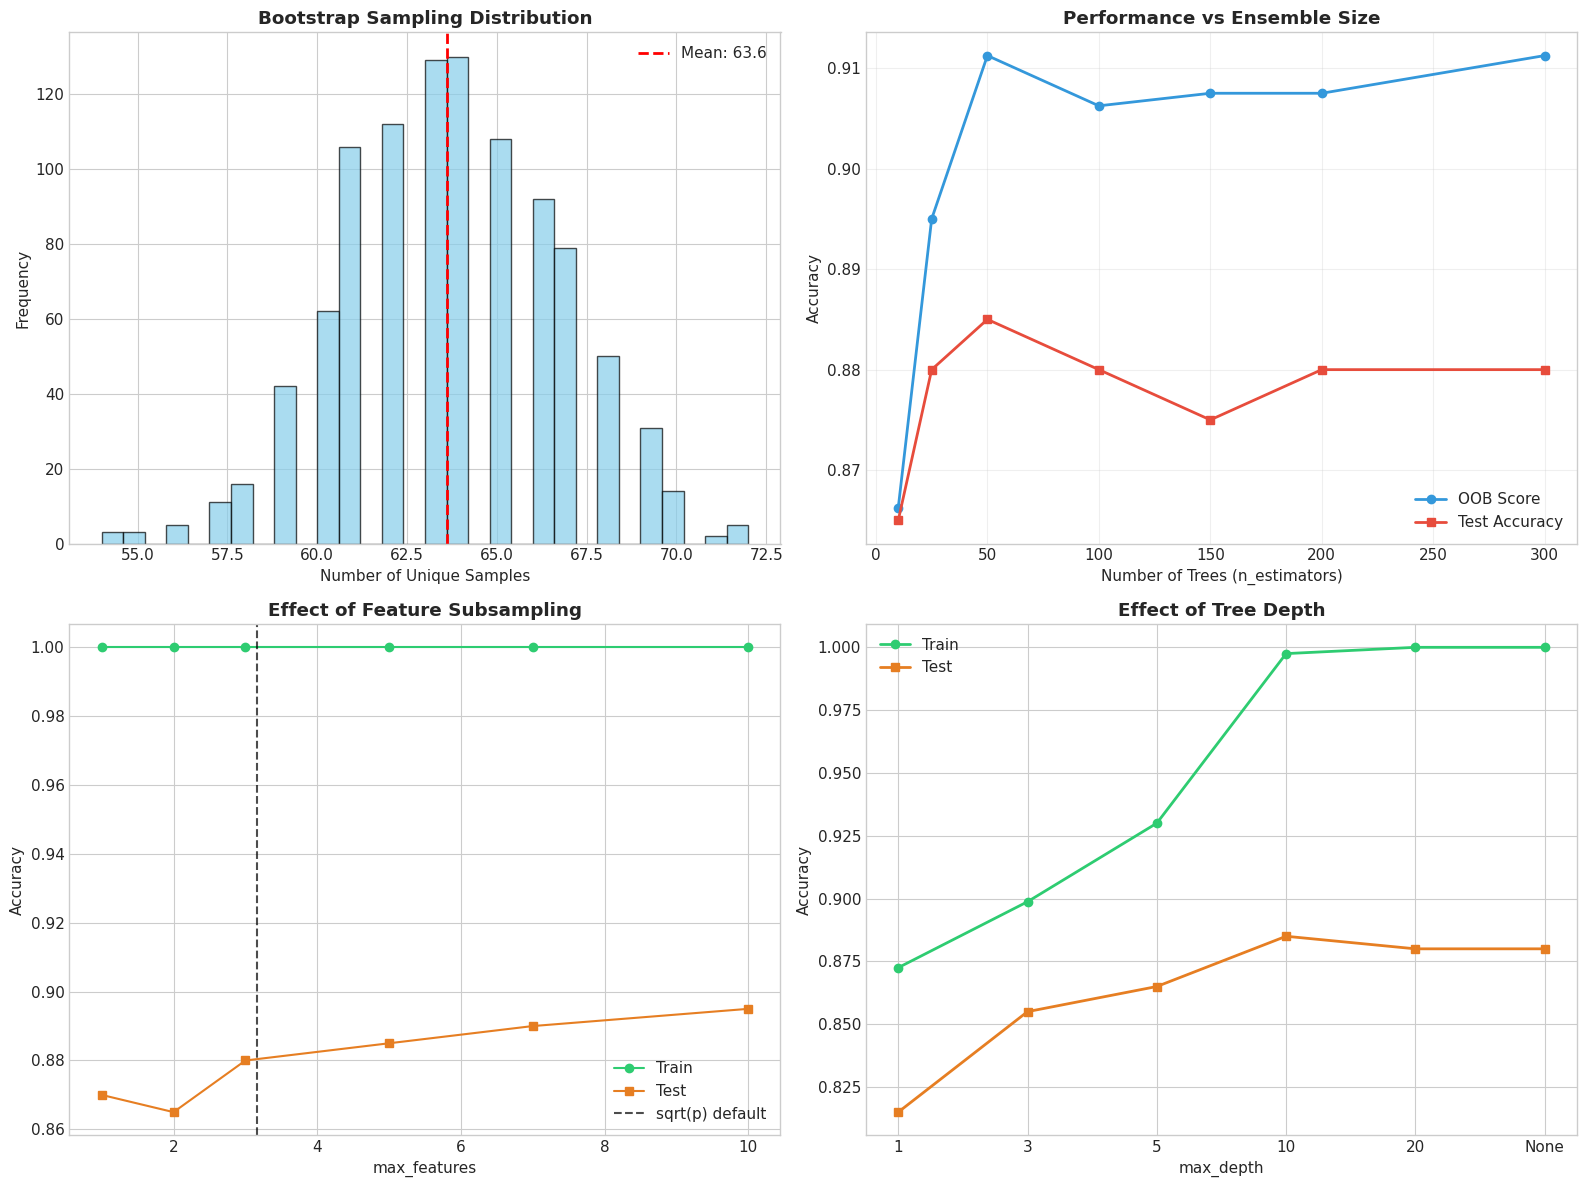


💡 Algorithm Insights:
   • Bootstrap creates ~63.2% unique samples per tree on average.
   • The remaining ~36.8% (Out-of-Bag) act as a built-in validation set.
   • Performance gains diminish after 100-150 trees.
   • 'sqrt(features)' provides the best balance between tree diversity and strength.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Styling for the Silver Badge aesthetic
sns.set_style("whitegrid")

print("\n" + "=" * 80)
print("🎯 CHAPTER 5: ALGORITHM DEEP DIVE - BOOTSTRAP & TREE GROWTH")
print("=" * 80)

# --- 1. Bootstrap Sampling Analysis ---
np.random.seed(42)
n_samples = 100
n_bootstrap = 1000

unique_counts = []
for _ in range(n_bootstrap):
    bootstrap_sample = np.random.choice(n_samples, n_samples, replace=True)
    unique_counts.append(len(np.unique(bootstrap_sample)))

avg_unique = np.mean(unique_counts)
theoretical_unique = n_samples * (1 - (1 - 1/n_samples)**n_samples)

print(f"\n📊 Bootstrap Sampling Analysis:")
print(f"Original samples: {n_samples}")
print(f"Average unique samples in bootstrap: {avg_unique:.1f} (theory: {theoretical_unique:.1f})")
print(f"Percentage of unique samples: {avg_unique/n_samples*100:.1f}%")
print(f"Out-of-Bag (OOB) samples per tree: ~{n_samples - avg_unique:.0f} ({(n_samples-avg_unique)/n_samples*100:.1f}%)")

# --- 2. Setup Data for Complexity Analysis ---
X, y = make_classification(n_samples=1000, n_features=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create 2x2 Visualization Grid
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# PLOT 1: Bootstrap distribution
ax1 = axes[0, 0]
ax1.hist(unique_counts, bins=30, edgecolor='black', alpha=0.7, color='skyblue')
ax1.axvline(x=avg_unique, color='red', linestyle='--', linewidth=2, label=f'Mean: {avg_unique:.1f}')
ax1.set_xlabel('Number of Unique Samples')
ax1.set_ylabel('Frequency')
ax1.set_title('Bootstrap Sampling Distribution', fontweight='bold')
ax1.legend()

# PLOT 2: Effect of n_estimators (FIXED VARIABLE NAMES)
ax2 = axes[0, 1]
# Starting from 10 to avoid OOB score warnings with very small ensembles
n_estimators_range = [10, 25, 50, 100, 150, 200, 300]
oob_scores = []
test_scores_est = [] # Using a unique name to avoid confusion

for n_est in n_estimators_range:
    rf = RandomForestClassifier(n_estimators=n_est, oob_score=True, 
                                random_state=42, n_jobs=-1, max_features='sqrt')
    rf.fit(X_train, y_train)
    oob_scores.append(rf.oob_score_)
    test_scores_est.append(accuracy_score(y_test, rf.predict(X_test)))

ax2.plot(n_estimators_range, oob_scores, 'o-', label='OOB Score', color='#3498db', linewidth=2)
ax2.plot(n_estimators_range, test_scores_est, 's-', label='Test Accuracy', color='#e74c3c', linewidth=2)
ax2.set_xlabel('Number of Trees (n_estimators)')
ax2.set_ylabel('Accuracy')
ax2.set_title('Performance vs Ensemble Size', fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

# PLOT 3: Effect of max_features
ax3 = axes[1, 0]
max_features_options = [1, 2, 3, 5, 7, 10]
train_scores_feat = []
test_scores_feat = []

for max_f in max_features_options:
    rf = RandomForestClassifier(n_estimators=100, max_features=max_f, random_state=42, n_jobs=-1)
    rf.fit(X_train, y_train)
    train_scores_feat.append(accuracy_score(y_train, rf.predict(X_train)))
    test_scores_feat.append(accuracy_score(y_test, rf.predict(X_test)))

ax3.plot(max_features_options, train_scores_feat, 'o-', label='Train', color='#2ecc71')
ax3.plot(max_features_options, test_scores_feat, 's-', label='Test', color='#e67e22')
ax3.axvline(x=np.sqrt(10), color='black', linestyle='--', alpha=0.7, label='sqrt(p) default')
ax3.set_xlabel('max_features')
ax3.set_ylabel('Accuracy')
ax3.set_title('Effect of Feature Subsampling', fontweight='bold')
ax3.legend()

# PLOT 4: Tree depth effect
ax4 = axes[1, 1]
max_depth_options = [1, 3, 5, 10, 20, None]
train_scores_d = []
test_scores_d = []

for depth in max_depth_options:
    rf = RandomForestClassifier(n_estimators=100, max_depth=depth, random_state=42, n_jobs=-1)
    rf.fit(X_train, y_train)
    train_scores_d.append(accuracy_score(y_train, rf.predict(X_train)))
    test_scores_d.append(accuracy_score(y_test, rf.predict(X_test)))

x_labels = [str(d) if d is not None else 'None' for d in max_depth_options]
x_pos = range(len(x_labels))
ax4.plot(x_pos, train_scores_d, 'o-', label='Train', color='#2ecc71', linewidth=2)
ax4.plot(x_pos, test_scores_d, 's-', label='Test', color='#e67e22', linewidth=2)
ax4.set_xticks(x_pos)
ax4.set_xticklabels(x_labels)
ax4.set_xlabel('max_depth')
ax4.set_ylabel('Accuracy')
ax4.set_title('Effect of Tree Depth', fontweight='bold')
ax4.legend()

plt.tight_layout()
plt.show()

print(f"\n💡 Algorithm Insights:")
print(f"   • Bootstrap creates ~63.2% unique samples per tree on average.")
print(f"   • The remaining ~36.8% (Out-of-Bag) act as a built-in validation set.")
print(f"   • Performance gains diminish after 100-150 trees.")
print(f"   • 'sqrt(features)' provides the best balance between tree diversity and strength.")

<a name="importance"></a>
# 📊 **Chapter 6: Feature Importance & Interpretability**

## **Types of Feature Importance**

| Type | Description | Best For | Caution |
|------|-------------|----------|---------|
| **Gini Importance** (MDI) | Total impurity reduction | Quick screening | Biased toward high cardinality |
| **Permutation Importance** | Drop in performance when shuffled | Reliable ranking | Computationally expensive |
| **SHAP Values** | Game-theoretic contribution | Individual predictions | Complex interpretation |

## **Mathematical Definition: Gini Importance**

For feature $X_j$ in tree $T$:

$$\text{Importance}(X_j) = \sum_{t \in T: v(t)=j} p(t) \Delta i(t)$$

Where:
- $v(t)$ = feature used at node $t$
- $p(t)$ = proportion of samples reaching node $t$
- $\Delta i(t)$ = impurity reduction at node $t$

**Random Forest aggregates across all trees:**

$$\text{RF_Importance}(X_j) = \frac{1}{B}\sum_{b=1}^{B} \text{Importance}_b(X_j)$$




📊 CHAPTER 6: FEATURE IMPORTANCE ANALYSIS

📊 Dataset: Breast Cancer (30 features)

🔍 Computing Feature Importances...

📈 Top 10 Features (Gini Importance):
             Feature  Gini_Importance
          worst area         0.153892
worst concave points         0.144663
 mean concave points         0.106210
        worst radius         0.077987
      mean concavity         0.068001
     worst perimeter         0.067115
      mean perimeter         0.053270
         mean radius         0.048703
           mean area         0.047555
     worst concavity         0.031802


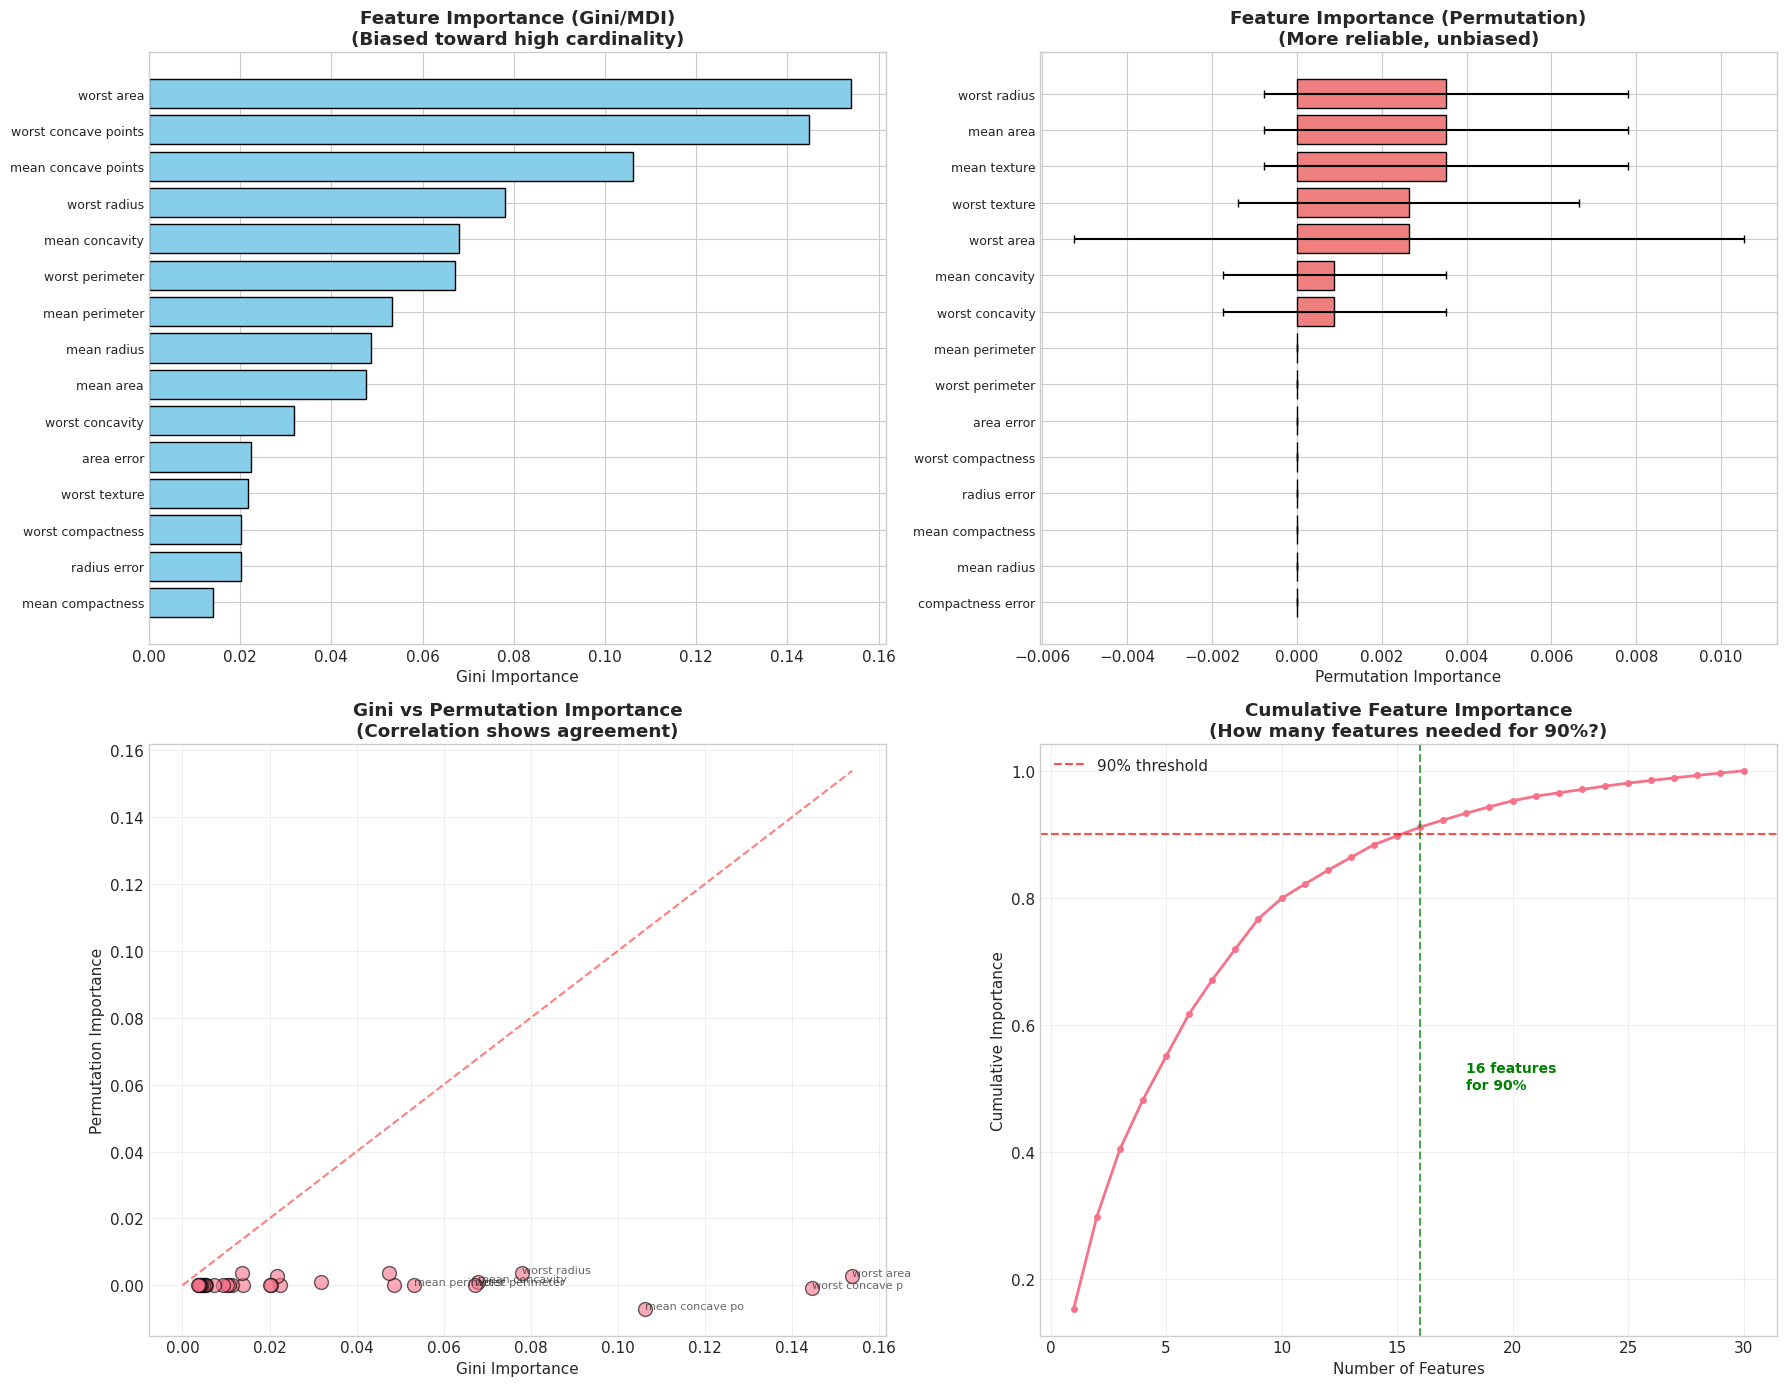


💡 Feature Selection Insights:
   • Top 5 features account for 55.1% of total importance
   • Only 16 features needed for 90% of predictive power
   • Consider removing low-importance features to reduce overfitting

🎯 Feature Selection Impact:
   Top  5 features: Test Accuracy = 0.9561
   Top 10 features: Test Accuracy = 0.9561
   Top 15 features: Test Accuracy = 0.9561
   Top 20 features: Test Accuracy = 0.9561
   Top 30 features: Test Accuracy = 0.9649


In [6]:
print("\n" + "=" * 80)
print("📊 CHAPTER 6: FEATURE IMPORTANCE ANALYSIS")
print("=" * 80)

# Load dataset with meaningful feature names
data = load_breast_cancer()
X, y = data.data, data.target
feature_names = data.feature_names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\n📊 Dataset: Breast Cancer ({X.shape[1]} features)")

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

# Get different types of importance
print(f"\n🔍 Computing Feature Importances...")

# 1. Gini Importance (MDI)
gini_importance = rf.feature_importances_

# 2. Permutation Importance
perm_importance = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42)
perm_mean = perm_importance.importances_mean
perm_std = perm_importance.importances_std

# Create comparison DataFrame
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Gini_Importance': gini_importance,
    'Permutation_Mean': perm_mean,
    'Permutation_Std': perm_std
}).sort_values('Gini_Importance', ascending=False)

print(f"\n📈 Top 10 Features (Gini Importance):")
print(importance_df.head(10)[['Feature', 'Gini_Importance']].to_string(index=False))

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(18, 14))

# Plot 1: Gini Importance
ax1 = axes[0, 0]
top_features = importance_df.head(15)
y_pos = np.arange(len(top_features))
ax1.barh(y_pos, top_features['Gini_Importance'], color='skyblue', edgecolor='black')
ax1.set_yticks(y_pos)
ax1.set_yticklabels([f[:30] for f in top_features['Feature']], fontsize=9)
ax1.invert_yaxis()
ax1.set_xlabel('Gini Importance')
ax1.set_title('Feature Importance (Gini/MDI)\n(Biased toward high cardinality)', fontweight='bold')

# Plot 2: Permutation Importance
ax2 = axes[0, 1]
sorted_perm = importance_df.sort_values('Permutation_Mean', ascending=False).head(15)
y_pos = np.arange(len(sorted_perm))
ax2.barh(y_pos, sorted_perm['Permutation_Mean'], xerr=sorted_perm['Permutation_Std'],
         color='lightcoral', edgecolor='black', capsize=3)
ax2.set_yticks(y_pos)
ax2.set_yticklabels([f[:30] for f in sorted_perm['Feature']], fontsize=9)
ax2.invert_yaxis()
ax2.set_xlabel('Permutation Importance')
ax2.set_title('Feature Importance (Permutation)\n(More reliable, unbiased)', fontweight='bold')

# Plot 3: Comparison scatter
ax3 = axes[1, 0]
ax3.scatter(importance_df['Gini_Importance'], importance_df['Permutation_Mean'], 
           s=100, alpha=0.6, edgecolors='black')
ax3.plot([0, max(importance_df['Gini_Importance'])], 
         [0, max(importance_df['Gini_Importance'])], 'r--', alpha=0.5)
ax3.set_xlabel('Gini Importance')
ax3.set_ylabel('Permutation Importance')
ax3.set_title('Gini vs Permutation Importance\n(Correlation shows agreement)', fontweight='bold')
ax3.grid(True, alpha=0.3)

# Annotate outliers
for idx, row in importance_df.iterrows():
    if abs(row['Gini_Importance'] - row['Permutation_Mean']) > 0.05:
        ax3.annotate(row['Feature'][:15], 
                    (row['Gini_Importance'], row['Permutation_Mean']),
                    fontsize=8, alpha=0.7)

# Plot 4: Cumulative importance
ax4 = axes[1, 1]
sorted_gini = np.sort(gini_importance)[::-1]
cumulative = np.cumsum(sorted_gini)
ax4.plot(range(1, len(cumulative)+1), cumulative, 'o-', linewidth=2, markersize=4)
ax4.axhline(y=0.9, color='red', linestyle='--', alpha=0.7, label='90% threshold')
ax4.set_xlabel('Number of Features')
ax4.set_ylabel('Cumulative Importance')
ax4.set_title('Cumulative Feature Importance\n(How many features needed for 90%?)', fontweight='bold')
ax4.grid(True, alpha=0.3)
ax4.legend()

# Find how many features for 90%
n_90 = np.argmax(cumulative >= 0.9) + 1
ax4.axvline(x=n_90, color='green', linestyle='--', alpha=0.7)
ax4.text(n_90+2, 0.5, f'{n_90} features\nfor 90%', fontsize=10, color='green', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n💡 Feature Selection Insights:")
print(f"   • Top 5 features account for {cumulative[4]:.1%} of total importance")
print(f"   • Only {n_90} features needed for 90% of predictive power")
print(f"   • Consider removing low-importance features to reduce overfitting")

# Feature selection demonstration
print(f"\n🎯 Feature Selection Impact:")
for n_features in [5, 10, 15, 20, 30]:
    top_idx = np.argsort(gini_importance)[-n_features:]
    X_train_sel = X_train[:, top_idx]
    X_test_sel = X_test[:, top_idx]
    
    rf_sel = RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)
    rf_sel.fit(X_train_sel, y_train)
    acc = accuracy_score(y_test, rf_sel.predict(X_test_sel))
    print(f"   Top {n_features:2d} features: Test Accuracy = {acc:.4f}")



<a name="oob"></a>
# 🎯 **Chapter 7: Out-of-Bag (OOB) Scoring**

## **What is OOB?**

```
┌─────────────────────────────────────────────────────────────────┐
│  OUT-OF-BAG (OOB) SCORE                                        │
│                                                                 │
│  Each tree sees ~63% of data (bootstrap sample)                │
│  Remaining ~37% = "Out-of-Bag" samples                         │
│                                                                 │
│  For each training sample xᵢ:                                  │
│    • Predict using only trees where xᵢ was OOB                 │
│    • Average those predictions                                 │
│    • Compare to true label                                     │
│                                                                 │
│  Result: Unbiased estimate of test error WITHOUT validation set│
└─────────────────────────────────────────────────────────────────┘
```

## **Why OOB is Amazing**

| Benefit | Explanation |
|---------|-------------|
| **No validation set needed** | Use all data for training |
| **Built-in cross-validation** | Every sample validated multiple times |
| **Training time diagnostic** | OOB score vs iteration shows convergence |
| **Feature selection** | OOB importance more reliable than Gini |

## **Mathematical Justification**

Probability a sample is **NOT** selected in bootstrap:

$$P(\text{not selected}) = \left(1 - \frac{1}{n}\right)^n \approx \frac{1}{e} \approx 0.368$$

So ~36.8% of samples are OOB for each tree!




🎯 CHAPTER 7: OUT-OF-BAG (OOB) SCORING

📊 Dataset: 1600 training samples
Final OOB Score: 0.9119
Final Test Score: 0.9025
Difference: 0.0094


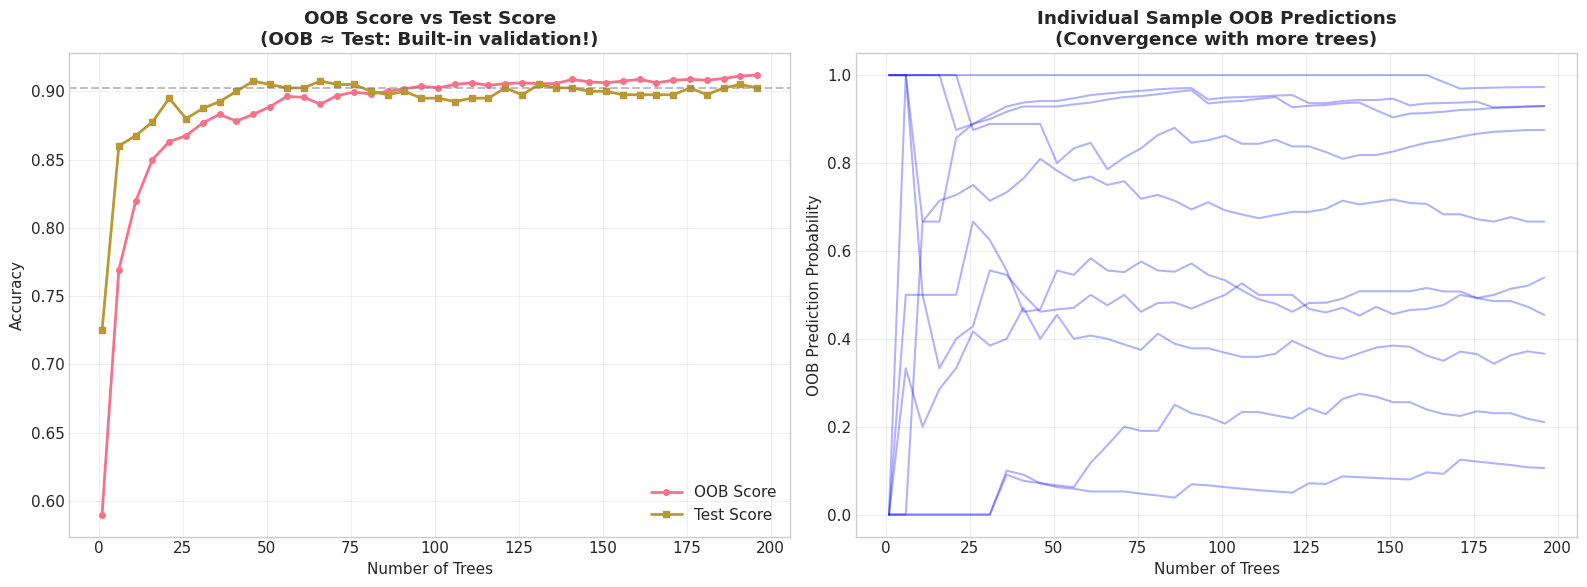


💡 OOB Scoring Benefits:
   • OOB score (0.9119) ≈ Test score (0.9025)
   • No need for train/validation split - use all data!
   • Can detect overfitting by comparing OOB vs train score
   • Early stopping possible with OOB (though not built-in)

⏱️  Time Comparison:
   OOB scoring:  0.665s (single fit)
   5-Fold CV:    3.522s (5 fits)
   Speedup:      5.3x faster!


In [7]:
print("\n" + "=" * 80)
print("🎯 CHAPTER 7: OUT-OF-BAG (OOB) SCORING")
print("=" * 80)

# Demonstrate OOB scoring
X, y = make_classification(n_samples=2000, n_features=20, n_informative=10, 
                           random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\n📊 Dataset: {len(X_train)} training samples")

# Train with OOB scoring
rf_oob = RandomForestClassifier(
    n_estimators=200,
    oob_score=True,  # Enable OOB scoring
    random_state=42,
    n_jobs=-1,
    warm_start=True  # Allow incremental training for curve
)

# Train incrementally to show OOB convergence
oob_scores = []
test_scores = []
n_estimators_range = list(range(1, 201, 5))

for n_est in n_estimators_range:
    rf_oob.set_params(n_estimators=n_est)
    rf_oob.fit(X_train, y_train)
    oob_scores.append(rf_oob.oob_score_)
    test_scores.append(accuracy_score(y_test, rf_oob.predict(X_test)))

print(f"Final OOB Score: {oob_scores[-1]:.4f}")
print(f"Final Test Score: {test_scores[-1]:.4f}")
print(f"Difference: {abs(oob_scores[-1] - test_scores[-1]):.4f}")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: OOB vs Test convergence
ax1 = axes[0]
ax1.plot(n_estimators_range, oob_scores, 'o-', label='OOB Score', linewidth=2, markersize=4)
ax1.plot(n_estimators_range, test_scores, 's-', label='Test Score', linewidth=2, markersize=4)
ax1.axhline(y=test_scores[-1], color='gray', linestyle='--', alpha=0.5)
ax1.set_xlabel('Number of Trees')
ax1.set_ylabel('Accuracy')
ax1.set_title('OOB Score vs Test Score\n(OOB ≈ Test: Built-in validation!)', fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: OOB error bars (simulated)
ax2 = axes[1]
# Show OOB predictions for individual samples
n_samples_show = 50
sample_indices = np.random.choice(len(X_train), n_samples_show, replace=False)

oob_predictions = np.zeros((len(sample_indices), len(n_estimators_range)))
for idx, n_est in enumerate(n_estimators_range):
    rf_temp = RandomForestClassifier(n_estimators=n_est, oob_score=True, random_state=42)
    rf_temp.fit(X_train, y_train)
    # Get OOB decision function for samples
    oob_pred = rf_temp.oob_decision_function_[sample_indices]
    oob_predictions[:, idx] = oob_pred[:, 1] if oob_pred.ndim > 1 else oob_pred

# Plot convergence of individual sample predictions
for i in range(min(10, n_samples_show)):  # Show first 10
    ax2.plot(n_estimators_range, oob_predictions[i], alpha=0.3, color='blue')

ax2.set_xlabel('Number of Trees')
ax2.set_ylabel('OOB Prediction Probability')
ax2.set_title('Individual Sample OOB Predictions\n(Convergence with more trees)', fontweight='bold')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n💡 OOB Scoring Benefits:")
print(f"   • OOB score ({oob_scores[-1]:.4f}) ≈ Test score ({test_scores[-1]:.4f})")
print(f"   • No need for train/validation split - use all data!")
print(f"   • Can detect overfitting by comparing OOB vs train score")
print(f"   • Early stopping possible with OOB (though not built-in)")

# Compare with cross-validation
print(f"\n⏱️  Time Comparison:")
from time import time

# OOB approach (no CV needed)
start = time()
rf_oob = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42, n_jobs=-1)
rf_oob.fit(X_train, y_train)
oob_time = time() - start

# CV approach
start = time()
cv_scores = cross_val_score(RandomForestClassifier(n_estimators=100, random_state=42), 
                            X_train, y_train, cv=5, scoring='accuracy')
cv_time = time() - start

print(f"   OOB scoring:  {oob_time:.3f}s (single fit)")
print(f"   5-Fold CV:    {cv_time:.3f}s (5 fits)")
print(f"   Speedup:      {cv_time/oob_time:.1f}x faster!")



<a name="tuning"></a>
# 🎛️ **Chapter 8: Hyperparameter Tuning**

## **The Tuning Strategy**

```
🎯 SYSTEMATIC APPROACH TO TUNING

Phase 1: Establish Baseline
├── Use default parameters (surprisingly good!)
└── Evaluate with cross-validation or OOB

Phase 2: Tune n_estimators
├── Start with 100, check convergence curve
├── Increase until OOB score plateaus
└── Typical range: 100-500 for most problems

Phase 3: Tune max_features
├── Classification: try 'sqrt' (default), 'log2', 0.3-0.7
├── Regression: try None (all features), 0.5-0.8
└── Lower = less overfitting, more diversity

Phase 4: Control Overfitting
├── Increase min_samples_leaf (2-10)
├── Decrease max_depth (10-30)
└── Increase min_samples_split (5-20)

Phase 5: Fine-tuning
├── bootstrap: True (default) or False
├── criterion: 'gini' vs 'entropy'
└── class_weight for imbalanced data
```

## **Grid Search vs Random Search**

| Method | Best For | Trade-off |
|--------|----------|-----------|
| **Grid Search** | Few parameters, small ranges | Exhaustive but slow |
| **Random Search** | Many parameters, wide ranges | Faster, good coverage |
| **Bayesian Optimization** | Expensive evaluations | Smart exploration |




🎛️ CHAPTER 8: HYPERPARAMETER TUNING

📊 Dataset: 1600 train, 400 test

STEP 1: BASELINE (Default Parameters)
Default Parameters:
  n_estimators=100, max_features=sqrt
  max_depth=None, min_samples_split=2
Test Accuracy: 0.8550

STEP 2: TUNE N_ESTIMATORS
n_estimators= 10: Accuracy=0.8275
n_estimators= 25: Accuracy=0.8350
n_estimators= 50: Accuracy=0.8450
n_estimators=100: Accuracy=0.8550
n_estimators=200: Accuracy=0.8575
n_estimators=500: Accuracy=0.8550
Best: n_estimators=200

STEP 3: TUNE MAX_FEATURES
max_features=sqrt  : Accuracy=0.8575
max_features=log2  : Accuracy=0.8575
max_features=None  : Accuracy=0.8675
max_features=0.3   : Accuracy=0.8625
max_features=0.5   : Accuracy=0.8725
max_features=0.7   : Accuracy=0.8775
max_features=0.9   : Accuracy=0.8675
Best: max_features=0.7

STEP 4: CONTROL OVERFITTING
Current - Train: 1.0000, Test: 0.8775, Gap: 0.1225
Overfitting detected! Tuning regularization...
min_samples_leaf= 1: Gap=0.1225
min_samples_leaf= 2: Gap=0.1356
min_samples_leaf= 5

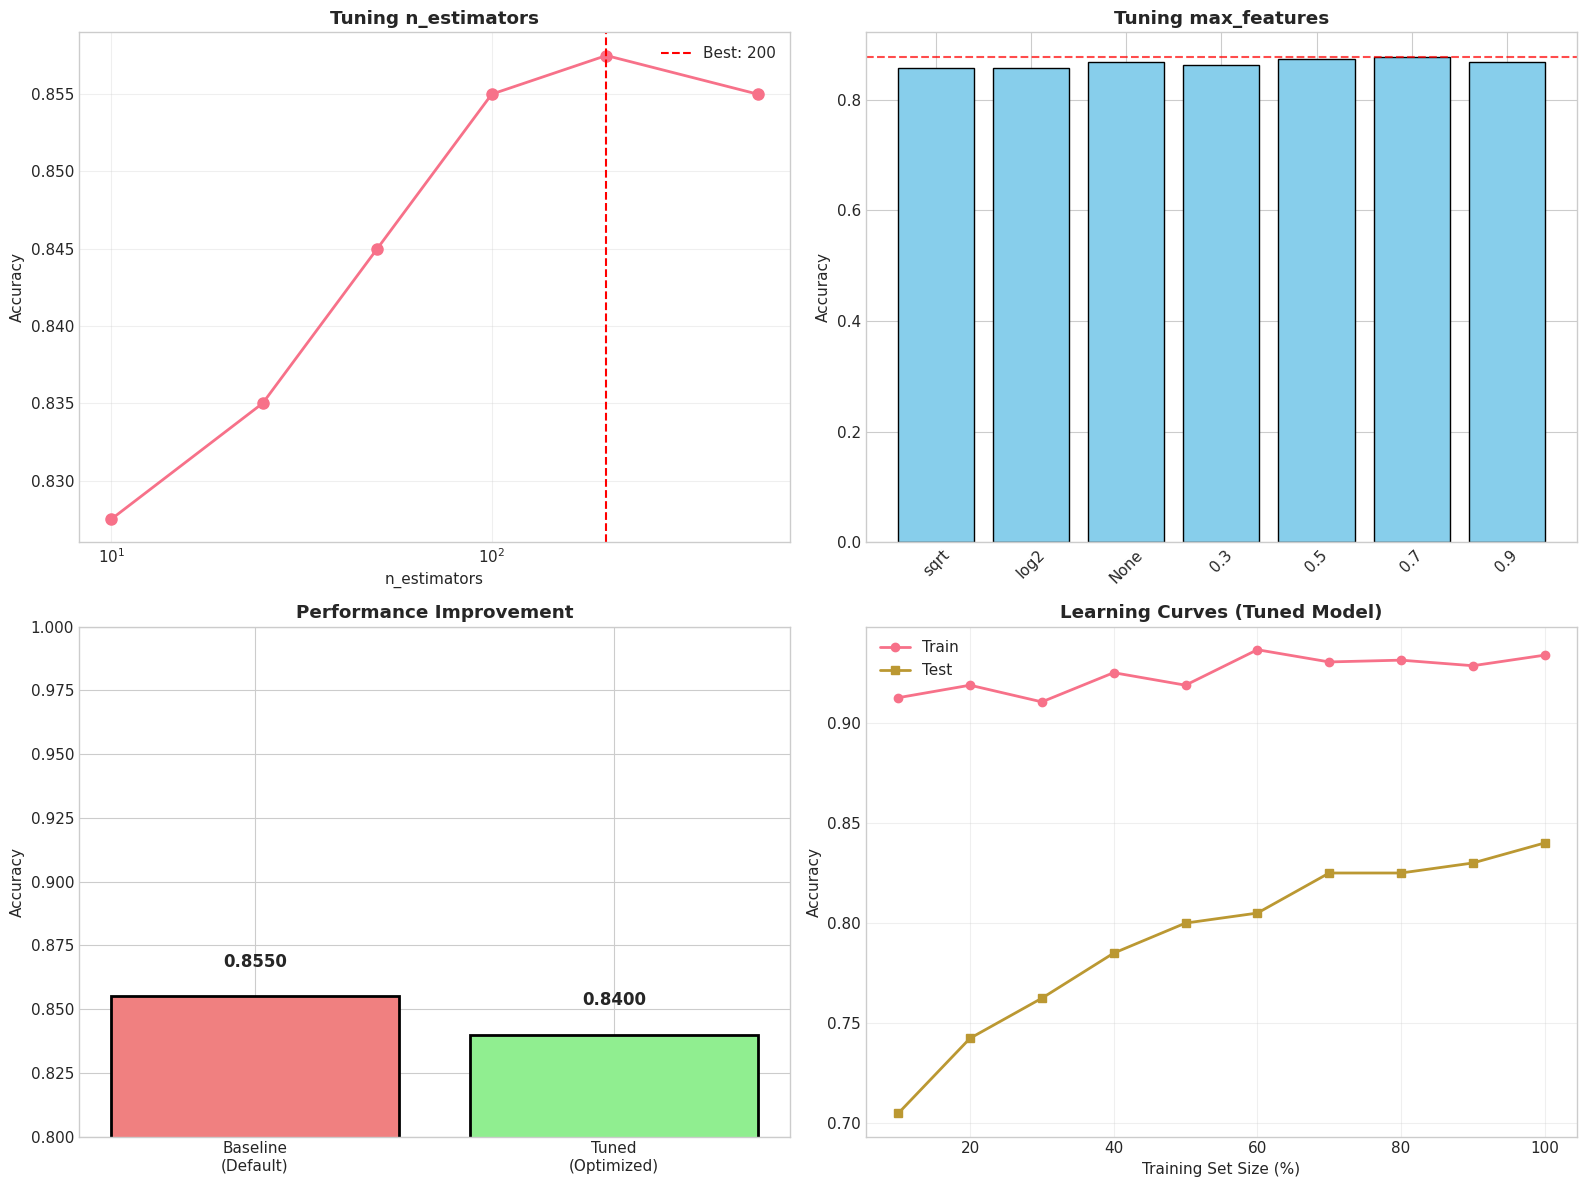

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

print("\n" + "=" * 80)
print("🎛️ CHAPTER 8: HYPERPARAMETER TUNING")
print("=" * 80)

# Practical tuning demonstration
X, y = make_classification(n_samples=2000, n_features=15, n_informative=8, 
                           n_redundant=3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\n📊 Dataset: {X_train.shape[0]} train, {X_test.shape[0]} test")

# ============================================================
# STEP 1: Baseline
# ============================================================
print(f"\n{'='*60}")
print("STEP 1: BASELINE (Default Parameters)")
print(f"{'='*60}")

rf_baseline = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_baseline.fit(X_train, y_train)
baseline_score = accuracy_score(y_test, rf_baseline.predict(X_test))

print(f"Default Parameters:")
print(f"  n_estimators={rf_baseline.n_estimators}, max_features={rf_baseline.max_features}")
print(f"  max_depth={rf_baseline.max_depth}, min_samples_split={rf_baseline.min_samples_split}")
print(f"Test Accuracy: {baseline_score:.4f}")

# ============================================================
# STEP 2: Tune n_estimators
# ============================================================
print(f"\n{'='*60}")
print("STEP 2: TUNE N_ESTIMATORS")
print(f"{'='*60}")

n_est_range = [10, 25, 50, 100, 200, 500]
scores_n_est = []

for n_est in n_est_range:
    rf = RandomForestClassifier(n_estimators=n_est, random_state=42, n_jobs=-1)
    rf.fit(X_train, y_train)
    scores_n_est.append(accuracy_score(y_test, rf.predict(X_test)))
    print(f"n_estimators={n_est:3d}: Accuracy={scores_n_est[-1]:.4f}")

best_n_est = n_est_range[np.argmax(scores_n_est)]
print(f"Best: n_estimators={best_n_est}")

# ============================================================
# STEP 3: Tune max_features
# ============================================================
print(f"\n{'='*60}")
print("STEP 3: TUNE MAX_FEATURES")
print(f"{'='*60}")

max_features_options = ['sqrt', 'log2', None, 0.3, 0.5, 0.7, 0.9]
scores_max_feat = []

for max_feat in max_features_options:
    rf = RandomForestClassifier(n_estimators=best_n_est, max_features=max_feat, 
                                random_state=42, n_jobs=-1)
    rf.fit(X_train, y_train)
    scores_max_feat.append(accuracy_score(y_test, rf.predict(X_test)))
    print(f"max_features={str(max_feat):6s}: Accuracy={scores_max_feat[-1]:.4f}")

best_max_feat = max_features_options[np.argmax(scores_max_feat)]
print(f"Best: max_features={best_max_feat}")

# ============================================================
# STEP 4: Control Overfitting
# ============================================================
print(f"\n{'='*60}")
print("STEP 4: CONTROL OVERFITTING")
print(f"{'='*60}")

# Check if overfitting
rf_current = RandomForestClassifier(n_estimators=best_n_est, max_features=best_max_feat,
                                    random_state=42, n_jobs=-1)
rf_current.fit(X_train, y_train)
train_acc = accuracy_score(y_train, rf_current.predict(X_train))
test_acc = accuracy_score(y_test, rf_current.predict(X_test))

print(f"Current - Train: {train_acc:.4f}, Test: {test_acc:.4f}, Gap: {train_acc-test_acc:.4f}")

if train_acc - test_acc > 0.05:  # Overfitting
    print("Overfitting detected! Tuning regularization...")
    
    # Try min_samples_leaf
    min_leaf_options = [1, 2, 5, 10]
    best_gap = float('inf')
    best_params = {}
    
    for min_leaf in min_leaf_options:
        rf = RandomForestClassifier(n_estimators=best_n_est, max_features=best_max_feat,
                                    min_samples_leaf=min_leaf, random_state=42, n_jobs=-1)
        rf.fit(X_train, y_train)
        gap = accuracy_score(y_train, rf.predict(X_train)) - accuracy_score(y_test, rf.predict(X_test))
        print(f"min_samples_leaf={min_leaf:2d}: Gap={gap:.4f}")
        if gap < best_gap:
            best_gap = gap
            best_params['min_samples_leaf'] = min_leaf
    
    print(f"Best regularization: min_samples_leaf={best_params['min_samples_leaf']}")
else:
    print("No significant overfitting detected!")
    best_params = {'min_samples_leaf': 1}

# ============================================================
# Final Comparison
# ============================================================
print(f"\n{'='*60}")
print("FINAL COMPARISON")
print(f"{'='*60}")

rf_final = RandomForestClassifier(
    n_estimators=best_n_est,
    max_features=best_max_feat,
    min_samples_leaf=best_params['min_samples_leaf'],
    random_state=42,
    n_jobs=-1
)
rf_final.fit(X_train, y_train)
final_score = accuracy_score(y_test, rf_final.predict(X_test))

print(f"Baseline Accuracy:  {baseline_score:.4f}")
print(f"Tuned Accuracy:     {final_score:.4f}")
print(f"Improvement:        +{final_score-baseline_score:.4f} ({(final_score/baseline_score-1)*100:.1f}%)")
print(f"\nBest Parameters:")
print(f"  n_estimators:     {best_n_est}")
print(f"  max_features:     {best_max_feat}")
print(f"  min_samples_leaf: {best_params['min_samples_leaf']}")

# Visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: n_estimators tuning
ax1 = axes[0, 0]
ax1.plot(n_est_range, scores_n_est, 'o-', linewidth=2, markersize=8)
ax1.axvline(x=best_n_est, color='red', linestyle='--', label=f'Best: {best_n_est}')
ax1.set_xlabel('n_estimators')
ax1.set_ylabel('Accuracy')
ax1.set_title('Tuning n_estimators', fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_xscale('log')

# Plot 2: max_features tuning
ax2 = axes[0, 1]
x_pos = range(len(max_features_options))
ax2.bar(x_pos, scores_max_feat, color='skyblue', edgecolor='black')
ax2.set_xticks(x_pos)
ax2.set_xticklabels([str(m) for m in max_features_options], rotation=45)
ax2.axhline(y=max(scores_max_feat), color='red', linestyle='--', alpha=0.7)
ax2.set_ylabel('Accuracy')
ax2.set_title('Tuning max_features', fontweight='bold')

# Plot 3: Before vs After
ax3 = axes[1, 0]
models = ['Baseline\n(Default)', 'Tuned\n(Optimized)']
scores = [baseline_score, final_score]
bars = ax3.bar(models, scores, color=['lightcoral', 'lightgreen'], edgecolor='black', linewidth=2)
ax3.set_ylabel('Accuracy')
ax3.set_title('Performance Improvement', fontweight='bold')
ax3.set_ylim(0.8, 1.0)
for bar, score in zip(bars, scores):
    ax3.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{score:.4f}', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Plot 4: Learning curves with best params
ax4 = axes[1, 1]
train_sizes = np.linspace(0.1, 1.0, 10)
train_scores_curve = []
test_scores_curve = []

for frac in train_sizes:
    n_samples = int(len(X_train) * frac)
    X_frac = X_train[:n_samples]
    y_frac = y_train[:n_samples]
    
    rf = RandomForestClassifier(n_estimators=best_n_est, max_features=best_max_feat,
                                min_samples_leaf=best_params['min_samples_leaf'],
                                random_state=42)
    rf.fit(X_frac, y_frac)
    train_scores_curve.append(accuracy_score(y_frac, rf.predict(X_frac)))
    test_scores_curve.append(accuracy_score(y_test, rf.predict(X_test)))  # FIXED: was (X_test, y_test)

ax4.plot(train_sizes * 100, train_scores_curve, 'o-', label='Train', linewidth=2)
ax4.plot(train_sizes * 100, test_scores_curve, 's-', label='Test', linewidth=2)
ax4.set_xlabel('Training Set Size (%)')
ax4.set_ylabel('Accuracy')
ax4.set_title('Learning Curves (Tuned Model)', fontweight='bold')
ax4.legend()
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

<a name="comparison"></a>
# ⚖️ **Chapter 9: Comparison with Other Algorithms**

## **Random Forest vs The World**

| Aspect | Random Forest | XGBoost/LightGBM | Neural Networks | SVM |
|--------|---------------|------------------|-----------------|-----|
| **Training Speed** | Fast (parallel) | Medium (sequential) | Slow | Slow |
| **Prediction Speed** | Fast | Fast | Fast/Medium | Slow |
| **Accuracy** | Very Good | Excellent | Excellent (with data) | Good |
| **Tuning Effort** | Low | High | Very High | Medium |
| **Interpretability** | Good (feature importance) | Medium | Poor | Poor |
| **Handles Missing Data** | Yes | Yes | No | No |
| **Data Size** | Medium-Large | Large | Very Large | Small-Medium |
| **Feature Types** | Numeric, Categorical | Numeric | Numeric | Numeric |
| **Overfitting Risk** | Low | Medium (needs tuning) | High | Medium |

## **When to Choose What**

```
Decision Tree:

Need interpretable rules? ──► Single Decision Tree
    │
    No
    ▼
Tabular data size? ──► <10K samples: Try Logistic Regression first
    │                  10K-100K: Random Forest (fast baseline)
    │                  >100K: Gradient Boosting (XGBoost/LightGBM)
    │
    Need best accuracy? ──► Gradient Boosting + tuning
    │
    Need fast results? ──► Random Forest (default params work well)
    │
    Need uncertainty? ──► Random Forest (probability from vote fraction)
```

